In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [15]:
folder_path = "C:/Users/qhrrl/CodeExamples/3.Paper/0.Dataset"

pd_cur_train = pd.read_csv(folder_path + '/cur_training_all.csv')
pd_vib_train = pd.read_csv(folder_path + '/vib_training_all.csv')
np_cur_train = pd_cur_train.to_numpy()
np_vib_train = pd_vib_train.to_numpy()
cur_train_labels = np_cur_train[:,-1]
vib_train_labels = np_vib_train[:,-1]
pd_cur_train = pd_cur_train.drop(columns = ['Date','WATT','LABEL'])
pd_vib_train = pd_vib_train.drop(columns = ['Date','WATT','LABEL'])

# 1. Current

# 2. COR 봅시다

In [10]:
cur_corr = pd_cur_train.corr()

<AxesSubplot:>

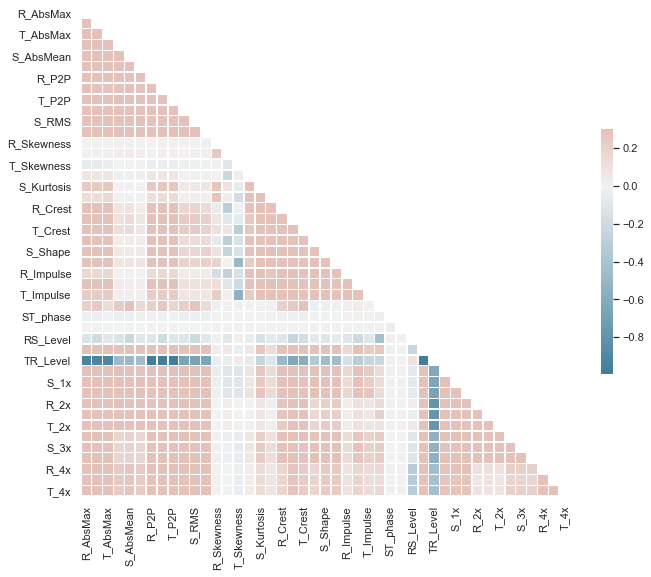

In [11]:
from string import ascii_letters
import seaborn as sns

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

mask = np.triu(np.ones_like(cur_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cur_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##  3. 주성분분석

In [25]:
# RMS(R,S,T)를 기준으로 정상과 고장을 판단하므로, 상관관계 분석을 통해서 RMS 3상과 높은 상관관계를 보이는 변수들은 독립적이지 않다고 판단하여 제거
# T_AbsMax,R_AbsMean,S_AbsMean,T_AbsMean,R_P2P,T_P2P,S_Skewness,TR_Level (상관관계가 3상과 모두 0.7이상이라 제거)
cur_dropped = cur_corr.drop(["T_AbsMax","R_AbsMean","S_AbsMean","T_AbsMean","R_P2P","T_P2P","S_Skewness","TR_Level"],axis=1)

In [26]:
cur_dropped

,R_AbsMax,S_AbsMax,S_P2P,R_RMS,S_RMS,T_RMS,R_Skewness,T_Skewness,R_Kurtosis,S_Kurtosis,...,T_1x,R_2x,S_2x,T_2x,R_3x,S_3x,T_3x,R_4x,S_4x,T_4x
R_AbsMax,1.000000,0.994317,0.938397,0.850523,0.847688,0.840450,-0.005086,-0.058268,0.070164,0.251341,...,0.718599,0.721835,0.720640,0.706554,0.531817,0.528552,0.522724,0.454454,0.431979,0.433347
S_AbsMax,0.994317,1.000000,0.946248,0.846036,0.852682,0.832479,0.003056,-0.064461,0.071957,0.256513,...,0.714364,0.713033,0.719505,0.694614,0.534976,0.531323,0.525955,0.474875,0.451071,0.453880
T_AbsMax,0.980649,0.973929,0.919236,0.827150,0.816690,0.834451,0.004248,-0.039532,0.074744,0.267539,...,0.734687,0.708624,0.699757,0.708631,0.543014,0.536798,0.533630,0.457446,0.430984,0.436554
R_AbsMean,0.696293,0.694313,0.479833,0.964513,0.961130,0.953616,-0.010780,-0.006205,-0.023488,-0.000151,...,0.303716,0.413713,0.421266,0.391920,0.186171,0.182629,0.177264,0.253319,0.244642,0.243640
S_AbsMean,0.698192,0.705578,0.499239,0.957030,0.966990,0.938023,-0.009991,-0.006678,-0.022054,0.001386,...,0.303214,0.406038,0.424565,0.377092,0.196228,0.193992,0.187531,0.282170,0.273947,0.272800
T_AbsMean,0.682959,0.677100,0.456269,0.958499,0.947336,0.962629,-0.009750,-0.002755,-0.023588,0.001255,...,0.300221,0.399972,0.400518,0.391290,0.182098,0.177677,0.174445,0.248050,0.237428,0.238350
R_P2P,0.942758,0.940327,0.994008,0.668509,0.670208,0.654463,0.005793,-0.038152,0.067331,0.248643,...,0.703606,0.788759,0.785995,0.774171,0.558223,0.552929,0.548713,0.456819,0.431115,0.434147
S_P2P,0.938397,0.946248,1.000000,0.669215,0.681773,0.651726,0.015298,-0.047187,0.071604,0.261137,...,0.698868,0.769394,0.775496,0.751431,0.562527,0.558889,0.553685,0.488073,0.462753,0.466036
T_P2P,0.933393,0.930597,0.985227,0.657199,0.654140,0.655197,0.016172,-0.034731,0.070922,0.261744,...,0.713869,0.782357,0.774610,0.778415,0.565635,0.558969,0.556965,0.465907,0.437727,0.444048
R_RMS,0.850523,0.846036,0.669215,1.000000,0.993396,0.992894,-0.016865,-0.019921,-0.002129,0.059909,...,0.491184,0.559210,0.561470,0.541951,0.324946,0.318771,0.313916,0.340354,0.323854,0.324561


# Vibration

In [16]:
vib_corr = pd_vib_train.corr()

<AxesSubplot:>

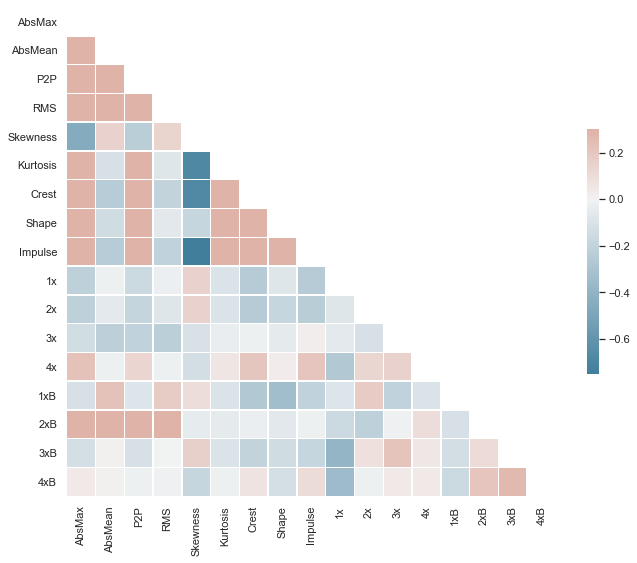

In [17]:
from string import ascii_letters
import seaborn as sns

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

mask = np.triu(np.ones_like(vib_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(vib_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from pandas.plotting import scatter_matrix
 
attributes = ["AbsMean", "P2P", "RMS", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
